In [1]:
%load_ext autotime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.preprocessing import RobustScaler

In [2]:
# Load data
train_data = pd.read_csv('train_data.csv', header= None)
train_labels = pd.read_csv('train_labels.csv', header= None)
test_data = pd.read_csv('test_data.csv', header= None)
submission_accu = pd.read_csv('dummy_solution_accuracy.csv')
submission_log = pd.read_csv('dummy_solution_logloss.csv')

time: 584 ms


In [10]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
outlier = ((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).sum()/len(train_data)*100
outlier

0       1.604401
1       2.796241
2       2.314921
3       4.469402
4       1.971121
5       1.421041
6       2.383681
7       3.300481
8       2.773321
9       1.306441
10      3.277561
11      2.544121
12      3.346321
13      5.111162
14      3.896402
15      4.194362
16      4.171442
17      3.667201
18      3.231721
19      4.561082
20      3.758882
21      3.506761
22      4.377722
23      3.483841
24     16.135686
25      0.229200
26      2.635801
27      3.117121
28      2.200321
29     14.943846
         ...    
234     3.965162
235     3.415081
236     2.910841
237     3.208801
238    10.932844
239     3.483841
240     0.733440
241     1.810681
242     1.031400
243     1.375201
244     1.260601
245     0.802200
246     0.733440
247     0.687600
248     0.870960
249     0.779280
250     0.733440
251     0.458400
252     0.550080
253     0.618840
254     0.412560
255     0.481320
256     0.504240
257     0.504240
258     0.733440
259     0.848040
260     0.939720
261     1.0772

time: 127 ms


[]

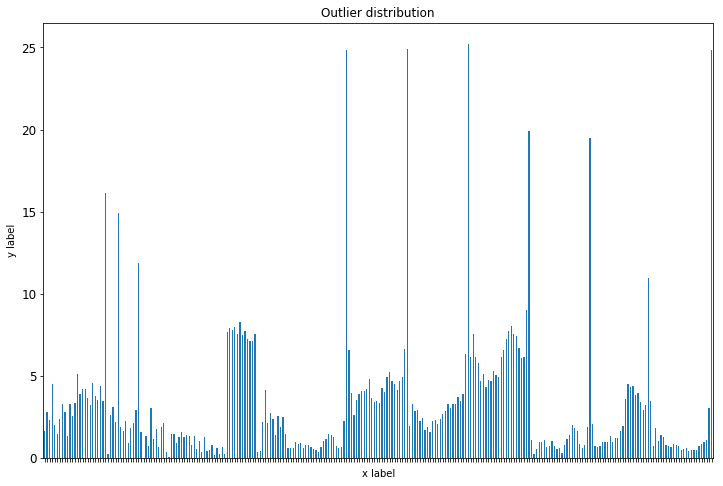

time: 2.08 s


In [16]:
ax = outlier.plot(kind='bar', title ="Outlier distribution", figsize=(12, 8), fontsize=12,legend=False, xticks = []);
ax.set_xlabel("Percentage of outliers");
ax.set_ylabel("The 264 predictors");
ax.xaxis.set_ticklabels([]);
plt.savefig('outlierdistribution.png')

In [6]:
visual2.T

,1,2,3,6,4,5,8,7,9,10
0,2178,618,326,260,253,214,195,141,92,86


time: 21.7 ms


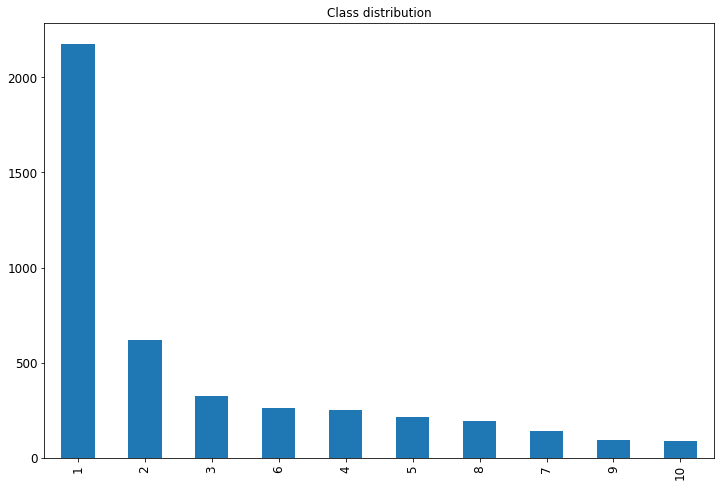

time: 366 ms


In [30]:
visual2 = train_labels[0].value_counts(dropna = False).to_frame()
visual2.plot(kind='bar', title ="Class distribution", figsize=(12, 8), fontsize=12,legend=False);
plt.savefig('classdistribution.png')

In [7]:
visual1 = train_data.describe().T
visual1

,count,mean,std,min,25%,50%,75%,max
0,4363.0,44.061232,5.623130,17.026000,40.756500,44.742000,48.307500,55.70600
1,4363.0,3.403105,49.095594,-334.950000,-22.828000,9.044300,35.714000,183.37000
2,4363.0,4.435200,34.225263,-171.400000,-15.133000,7.597600,26.429500,197.15000
3,4363.0,1.302779,15.924631,-89.266000,-8.000850,-0.725070,8.729200,107.24000
4,4363.0,-5.930146,22.144000,-111.360000,-19.883500,-5.618800,7.987050,161.90000
5,4363.0,-10.254129,12.222974,-72.304000,-19.033500,-11.443000,-2.915450,55.76400
6,4363.0,-1.237425,13.962585,-68.498000,-9.836150,-1.390900,6.970800,138.40000
7,4363.0,-2.546184,8.037242,-58.349000,-7.102450,-2.380500,2.087400,37.51200
8,4363.0,3.769297,9.955007,-68.361000,-2.017150,3.929100,9.741250,56.06900
9,4363.0,1.744708,6.640795,-31.270000,-2.663700,1.673600,5.950950,38.29400


time: 628 ms


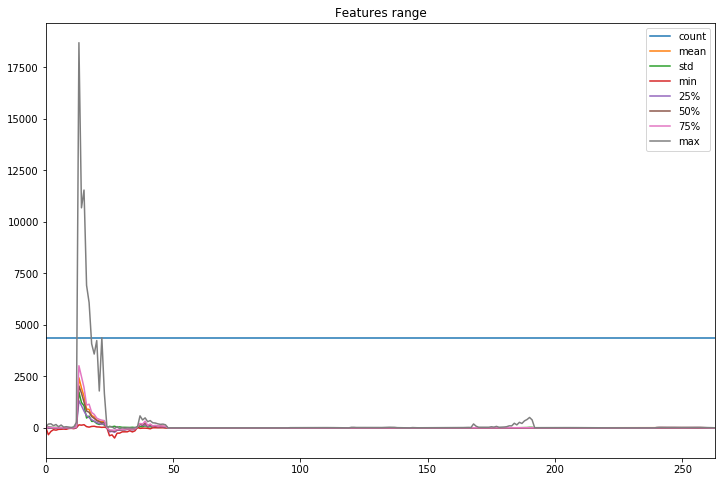

time: 445 ms


In [31]:
plt.figure();
visual1.plot(title ="Features range", figsize=(12, 8));
plt.savefig('featuresrange.png')
plt.show();

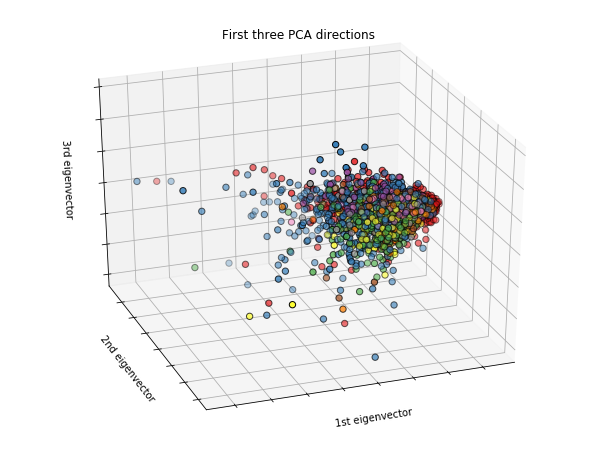

time: 1.38 s


In [32]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(train_data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=train_labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.savefig('pca.png')
plt.show()